# Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [32]:
def load_mnist_data() -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = load_mnist_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [33]:
X_train = X_train.astype('float64') / 256.0
X_test = X_test.astype('float64') / 256.0

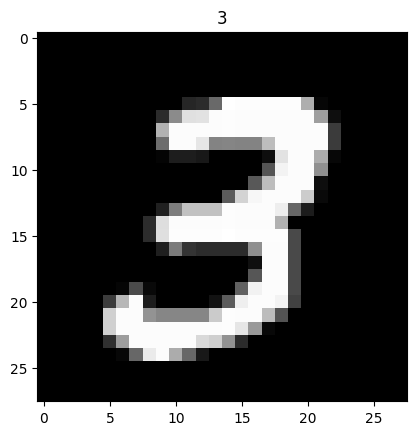

In [17]:
idx = 7
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.title(np.argmax(y_train[idx]))
plt.show()

## Helpers

### Plotting

In [6]:
def plot_training(history:keras.callbacks.History) -> None:
    for metric, values in history.history.items():
        plt.plot(values, label=metric)

    plt.title('Training History')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Values')
    
    plt.show()

# Basic Approach

In [22]:
def fc_block(
        inputs:keras.KerasTensor, 
        units:int, 
        activation:str='relu', 
        initializer:str='he_normal', 
        dropout_rate:float=0.5, 
) -> keras.KerasTensor:
    x = keras.layers.Dense(
        units=units, 
        activation=activation, 
        kernel_initializer=initializer
    )(inputs)
    x = keras.layers.Dropout(rate=dropout_rate)(x)
    x = keras.layers.BatchNormalization()(x)
    return x

Epoch 1/150
375/375 - 3s - 7ms/step - accuracy: 0.7211 - loss: 0.8989 - val_accuracy: 0.9251 - val_loss: 0.2770
Epoch 2/150
375/375 - 1s - 3ms/step - accuracy: 0.8689 - loss: 0.4561 - val_accuracy: 0.9449 - val_loss: 0.1917
Epoch 3/150
375/375 - 1s - 3ms/step - accuracy: 0.8999 - loss: 0.3555 - val_accuracy: 0.9545 - val_loss: 0.1619
Epoch 4/150
375/375 - 1s - 3ms/step - accuracy: 0.9124 - loss: 0.3110 - val_accuracy: 0.9579 - val_loss: 0.1455
Epoch 5/150
375/375 - 1s - 4ms/step - accuracy: 0.9223 - loss: 0.2769 - val_accuracy: 0.9612 - val_loss: 0.1341
Epoch 6/150
375/375 - 2s - 5ms/step - accuracy: 0.9274 - loss: 0.2592 - val_accuracy: 0.9616 - val_loss: 0.1306
Epoch 7/150
375/375 - 2s - 5ms/step - accuracy: 0.9297 - loss: 0.2513 - val_accuracy: 0.9642 - val_loss: 0.1231
Epoch 8/150
375/375 - 1s - 3ms/step - accuracy: 0.9340 - loss: 0.2305 - val_accuracy: 0.9663 - val_loss: 0.1188
Epoch 9/150
375/375 - 1s - 3ms/step - accuracy: 0.9376 - loss: 0.2213 - val_accuracy: 0.9670 - val_loss:

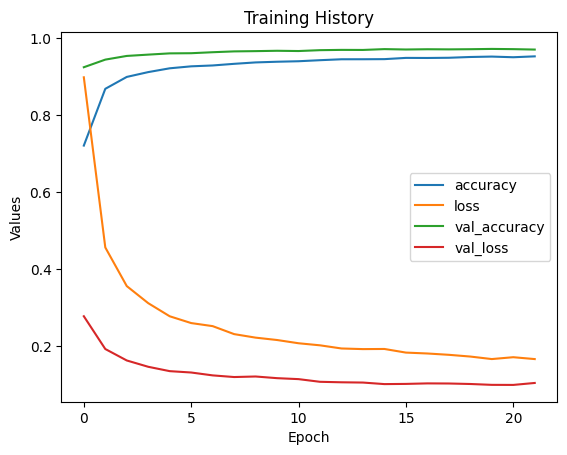

In [34]:
inputs = keras.layers.Input(shape=X_train.shape[1:])
x = fc_block(inputs, 128)
x = fc_block(x, 64)
x = keras.layers.Dense(10, activation='softmax')(x)
model_1 = keras.Model(inputs=inputs, outputs=x)

model_1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy',
    metrics=['accuracy'], 
)

callbacks = [keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    verbose=1, 
    restore_best_weights=True, 
    min_delta=0.01
)]

history_1:keras.callbacks.History = model_1.fit(
    X_train, y_train, 
    batch_size=128, 
    epochs=150, 
    validation_split=0.2, 
    verbose=2, 
    callbacks=callbacks
)

plot_training(history_1)

In [35]:
model_1.evaluate(X_test, y_test, verbose=0)

[0.10730805993080139, 0.968999981880188]